### Librery

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### data clearing

In [2]:
df= pd.read_csv("bank-marketing.csv", sep=";")
df.head(20)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
print(df.memory_usage(deep=True))

start_memory=df.memory_usage(deep=True).sum()

print(f'total is {start_memory}')

Index                 132
age                329504
job               2716564
marital           2629076
education         2871255
default           2473080
housing           2456618
loan              2441290
contact           2692264
month             2471280
day_of_week       2471280
duration           329504
campaign           329504
pdays              329504
previous           329504
poutcome          2778284
emp.var.rate       329504
cons.price.idx     329504
cons.conf.idx      329504
euribor3m          329504
nr.employed        329504
y                 2434732
dtype: int64
total is 31730895


In [4]:
(df
 .assign(y=pd.Series(np.where(df.y.values == 'no', 0, 1)).astype('int8'),
         housing=df.housing.map(dict(yes=1, no=0,unknown=9)).astype('int8'),
         default=df.default.map(dict(yes=1, no=0,unknown=9)).astype('int8'),
         loan=df.loan.map(dict(yes=1, no=0,unknown=9)).astype('int8'),
         marital=df.marital.map(dict(married=1, single=0,divorced=3,unknown=9)).astype('int8'),
         poutcome=df.poutcome.map(dict(success=1,failure=0,nonexistent=9)).astype('int8'),
         contact=pd.Series(np.where(df.contact.values == 'telephone', 0, 1)).astype('int8'),
         )
 .memory_usage(deep=True)
 .sum()
)


14113867

In [5]:
print((start_memory-14113867)/start_memory)

0.5552011060513736


In [6]:
def tweek_dataframe(db):
    return (df
             .assign(y=pd.Series(np.where(df.y.values == 'no', 0, 1)).astype('int8'),
         housing=df.housing.map(dict(yes=1, no=0,unknown=9)).astype('int8'),
         default=df.default.map(dict(yes=1, no=0,unknown=9)).astype('int8'),
         loan=df.loan.map(dict(yes=1, no=0,unknown=9)).astype('int8'),
         marital=df.marital.map(dict(married=1, single=0,divorced=3,unknown=9)).astype('int8'),
         poutcome=df.poutcome.map(dict(success=1,failure=0,nonexistent=9)).astype('int8'),
         contact=pd.Series(np.where(df.contact.values == 'telephone', 0, 1)).astype('int8'),
             )
           )

BM=tweek_dataframe(df)
BM

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,1,basic.4y,0,0,0,0,may,mon,...,1,999,0,9,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,1,high.school,9,0,0,0,may,mon,...,1,999,0,9,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,1,high.school,0,1,0,0,may,mon,...,1,999,0,9,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,1,basic.6y,0,0,0,0,may,mon,...,1,999,0,9,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,1,high.school,0,0,1,0,may,mon,...,1,999,0,9,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,1,professional.course,0,1,0,1,nov,fri,...,1,999,0,9,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,blue-collar,1,professional.course,0,0,0,1,nov,fri,...,1,999,0,9,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,retired,1,university.degree,0,1,0,1,nov,fri,...,2,999,0,9,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,technician,1,professional.course,0,0,0,1,nov,fri,...,1,999,0,9,-1.1,94.767,-50.8,1.028,4963.6,1


### data manipulation

In [73]:
group= BM.groupby('job')["y"].value_counts(normalize=True).unstack()*100
percentage=group[1].reset_index(name='Accepted loan').sort_values(by='Accepted loan', ascending=False).reset_index(drop=True)
percentage['Accepted loan']=percentage['Accepted loan'].round(2).astype(str)+'%'
percentage

,job,Accepted loan
0,student,31.43%
1,retired,25.23%
2,unemployed,14.2%
3,admin.,12.97%
4,management,11.22%
5,unknown,11.21%
6,technician,10.83%
7,self-employed,10.49%
8,housemaid,10.0%
9,entrepreneur,8.52%


<Axes: xlabel='month'>

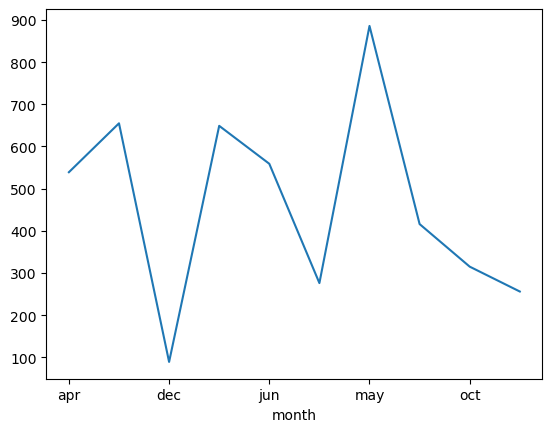

In [91]:
monthly= BM.groupby('month')['y'].value_counts().unstack()
acc=monthly[1]
acc.plot()
